# Density matrix exponentiation (DME) channel performance
The DME channel acts on the data qubit $\sigma$ as follows:
$$
\hat{E}_t^{(\rho)}(\sigma) = \text{Tr}_{1}\left[e^{-i t \text{SWAP}} (\rho\otimes\sigma) e^{i t \text{SWAP}}\right] \tag{1}
$$
where $t\in \mathbb R$ is the DME channel duration. 
Tthe DME channel transform the data registers into an approximation of the unitary $u_{\rho}=e^{-it\rho}$.

The following code will implement this channel on random data and instruction density matrix, and plot the norm $||e^{-it\rho}\sigma e^{it\rho} - \hat{E}_t^{(\rho)}(\sigma)||$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
# Import dme functions from the 'function' folder
from functions.dme import *

# Plot config
plt.rcParams.update({
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'font.size': 16,
    'savefig.dpi': 75,
    'lines.linewidth': 2.0,
    'lines.markersize': 8,
    'legend.fontsize': 14,
    'legend.labelspacing': .3,
    'legend.columnspacing': .3,
    'legend.handletextpad': .1,
    'text.usetex': True,
    'font.family': "serif",
    'font.serif': "cm",
    'figure.figsize': [5, 3.5],
    'figure.autolayout': True
})

In [3]:
# Create random data and instruction state
t = 1
muq = 50

psi0 = np.random.rand(2) + 1j * np.random.rand(2)
psi0 /= np.linalg.norm(psi0)
psi0 = psi0[np.newaxis].T
data = psi0@psi0.conj().T
print(data)

psi0 = np.random.rand(2) + 1j * np.random.rand(2)
psi0 /= np.linalg.norm(psi0)
psi0 = psi0[np.newaxis].T
instruction = psi0@psi0.conj().T
print(instruction)

[[0.76863371+0.j         0.27315473-0.32128247j]
 [0.27315473+0.32128247j 0.23136629+0.j        ]]
[[0.57115907+0.j         0.37406307-0.32405741j]
 [0.37406307+0.32405741j 0.42884093+0.j        ]]


In [4]:
# Calculate the expected density matrix, by applying the instruction unitary e^it\rho 
# on data register \sigma
expected_state = dme_expm(data,instruction,t,0)

In [5]:
# Applying the DME channel on the data and instruction qubits
rho_W = []
rho_list = []
rho_W = []
rho_list = []
for M in range(1,muq):
    _rho_W,_rho_list = dme_channel(data,instruction,t,M)
    rho_W.append(_rho_W[-1])
    rho_list.append(_rho_list[-1])

In [6]:
# An equivalent expression of DME channel, using cos and sine expansion 
# and does not require partial trace
rho_W_channel_equivalent = []
rho_list_channel_equivalent = []
for M in range(1,muq):
    _rho_W_channel_equivalent,_rho_list_channel_equivalent = dme_channel_equivalent(data,instruction,t,M)
    rho_W_channel_equivalent.append(_rho_W_channel_equivalent[-1])
    rho_list_channel_equivalent.append(_rho_list_channel_equivalent[-1])

In [7]:
# DME channel using qibo circuit
rho_W_qibo = []
rho_list_qibo = []
for M in range(1,muq):
    _rho_W_qibo,_rho_list_qibo = dme_qibo(data,instruction,t,M)
    rho_W_qibo.append(_rho_W_qibo[-1])
    rho_list_qibo.append(_rho_list_qibo[-1])


[Qibo 0.2.12|ERROR|2025-04-07 02:52:33]: The 'qibojit' backends' provider is not available. Check that a Python package named 'qibojit' is installed, and it is exposing valid Qibo backends.
[Qibo 0.2.12|ERROR|2025-04-07 02:52:33]: The 'qibojit' backends' provider is not available. Check that a Python package named 'qibojit' is installed, and it is exposing valid Qibo backends.
[Qibo 0.2.12|INFO|2025-04-07 02:52:33]: Using numpy backend on /CPU:0


In [8]:
# Calculating the norm between the DME channels calculated above
# and the expected operation
norm_dme = [np.linalg.norm(expected_state-state) for state in rho_list]
norm_channel_equivalent = [np.linalg.norm(expected_state-state) for state in rho_list_channel_equivalent]
norm_qibo = [np.linalg.norm(expected_state-state) for state in rho_list_qibo]

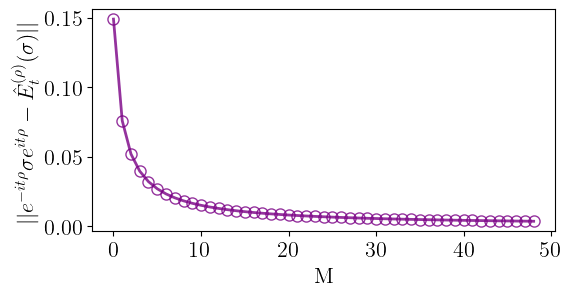

In [9]:
# Here the DME channel as given in equation (1) is plotted. 
plt.plot(norm_dme,marker='o',markerfacecolor='none',alpha=0.8,color='#7a0085')
plt.xlabel('M')
plt.ylabel(r'$|| e^{-it\rho}\sigma e^{it\rho} - \hat{E}_t^{(\rho)}(\sigma) ||$')
#plt.grid()
plt.tight_layout()
plt.savefig(f'plots/DME_norm.pdf')

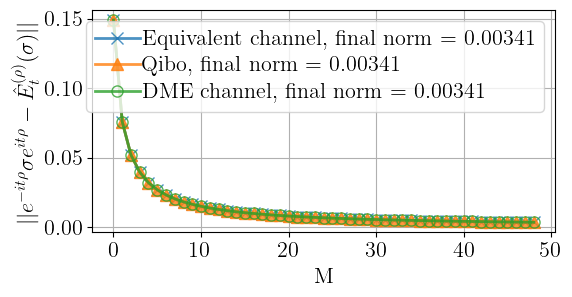

In [10]:
# To plot other channels calculated above, un-comment the following lines 
# (if they are currently commented)
plt.plot(norm_channel_equivalent,marker='x',alpha=0.8,label=f'Equivalent channel, final norm = {float('%.3g' % norm_channel_equivalent[-1])}')
plt.plot(norm_qibo,marker='^',alpha=0.8,label=f'Qibo, final norm = {float('%.3g' % norm_qibo[-1])}')
plt.plot(norm_dme,marker='o',markerfacecolor='none',alpha=0.8,label=f'DME channel, final norm = {float('%.3g' % norm_dme[-1])}')
plt.xlabel('M')
plt.ylabel(r'$|| e^{-it\rho}\sigma e^{it\rho} - \hat{E}_t^{(\rho)}(\sigma) ||$')
plt.grid()
plt.legend()


## NOTE: I'm not going through with QME for now
## Density matrix exponentiation (DME) channel using QME performance
The DME channel acts on the data qubit $\sigma$ as follows:
$$
\hat{E}_t^{(\rho)}(\sigma) = \text{Tr}_{1}\left[e^{-i t \text{SWAP}} (\rho\otimes\sigma) e^{i t \text{SWAP}}\right] \tag{1}
$$
where $t\in \mathbb R$ is the DME channel duration. 
Tthe DME channel transform the data registers into an approximation of the unitary $u_{\rho}=e^{-it\rho}$.

The following code will implement this channel on random data and instruction density matrix, and plot the norm $||e^{-it\rho}\sigma e^{it\rho} - \hat{E}_t^{(\rho)}(\sigma)||$

In [ ]:
from scipy.linalg import expm

In [ ]:
# Create random data and instruction state
t = 1
muq = 50

psi0 = np.random.rand(2) + 1j * np.random.rand(2)
psi0 /= np.linalg.norm(psi0)
psi0 = psi0[np.newaxis].T
data = psi0@psi0.conj().T
print(data)

psi0 = np.random.rand(2) + 1j * np.random.rand(2)
psi0 /= np.linalg.norm(psi0)
psi0 = psi0[np.newaxis].T
instruction = psi0@psi0.conj().T
print(instruction)

[[0.26626281+0.j         0.42817315-0.10970268j]
 [0.42817315+0.10970268j 0.73373719+0.j        ]]
[[0.37482405+0.j         0.31094469+0.37100456j]
 [0.31094469-0.37100456j 0.62517595+0.j        ]]


In [ ]:
# Calculate the expected density matrix, by applying the instruction unitary e^it\rho 
# on data register \sigma
expected_state = dme_expm(data,instruction,t,0)

In [ ]:
# Applying the DME channel on the data and instruction qubits
rho_W = []
rho_list = []
rho_W = []
rho_list = []
for M in range(1,muq):
    _rho_W,_rho_list = dme_channel(data,instruction,t,M)
    rho_W.append(_rho_W[-1])
    rho_list.append(_rho_list[-1])

In [ ]:
from random import choice

swap = np.array([[1, 0, 0, 0],
                [0, 0, 1, 0],
                [0, 1, 0, 0],
                [0, 0, 0, 1]], dtype=complex)

I = np.array([[1,0],[0,1]])
X = np.array([[0,1],[1,0]])

II = np.kron(I,I)

def qme(state,u,instruction = X):
    IR = np.kron(I,instruction) 
    gate = choice([II,IR])
    return gate @ u @ state @ (u.conj().T) @ (gate.conj().T)

def dme_qme(data, instruction, t, M, num_tomo = 200):
    states = []
    _t = t/M
    u = expm(1j*_t*swap)
    for j in range(num_tomo):
        state = np.kron(data,instruction)
        for i in range(M):
            state = qme(state,u,instruction)
        states.append(state)
    return ptrace(np.mean(states,axis=0))


In [ ]:
# Applying the DME channel on the data and instruction qubits
rho_W = []
rho_list = []
rho_W = []
rho_list = []
for M in range(1,muq):
    _rho_W,_rho_list = dme_qme(data,instruction,t,M)
    rho_W.append(_rho_W)

In [ ]:
# An equivalent expression of DME channel, using cos and sine expansion 
# and does not require partial trace
rho_W_channel_equivalent = []
rho_list_channel_equivalent = []
for M in range(1,muq):
    _rho_W_channel_equivalent,_rho_list_channel_equivalent = dme_channel_equivalent(data,instruction,t,M)
    rho_W_channel_equivalent.append(_rho_W_channel_equivalent)

In [ ]:
# DME channel using qibo circuit
rho_W_qibo = []
rho_list_qibo = []
for M in range(1,muq):
    _rho_W_qibo,_rho_list_qibo = dme_qibo(data,instruction,t,M)
    rho_W_qibo.append(_rho_W_qibo)


[Qibo 0.2.11|INFO|2025-04-11 12:44:23]: Using qibojit (numba) backend on /CPU:0


In [ ]:
# Calculating the norm between the DME channels calculated above
# and the expected operation
norm_dme = [np.linalg.norm(expected_state-state) for state in rho_W]
norm_channel_equivalent = [np.linalg.norm(expected_state-state) for state in rho_W_channel_equivalent]
norm_qibo = [np.linalg.norm(expected_state-state) for state in rho_W_qibo]

findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none

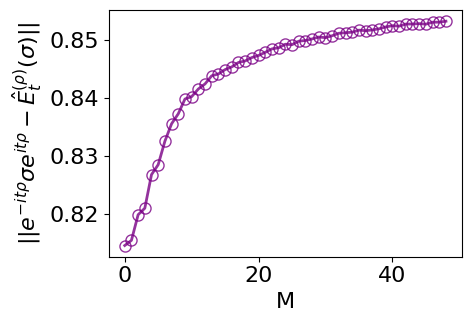

In [ ]:
# Here the DME channel as given in equation (1) is plotted. 
plt.plot(norm_dme,marker='o',markerfacecolor='none',alpha=0.8,color='#7a0085')
plt.xlabel('M')
plt.ylabel(r'$|| e^{-it\rho}\sigma e^{it\rho} - \hat{E}_t^{(\rho)}(\sigma) ||$')
#plt.grid()
plt.tight_layout()
plt.savefig(f'plots/DME_norm.pdf')

findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'seri

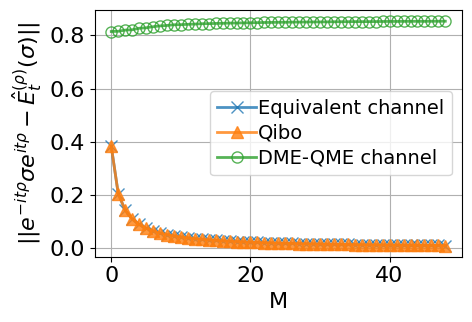

In [ ]:
# To plot other channels calculated above, un-comment the following lines 
# (if they are currently commented)
plt.plot(norm_channel_equivalent,marker='x',alpha=0.8,label=f'Equivalent channel')
plt.plot(norm_qibo,marker='^',alpha=0.8,label=f'Qibo')
plt.plot(norm_dme,marker='o',markerfacecolor='none',alpha=0.8,label=f'DME-QME channel')
plt.xlabel('M')
plt.ylabel(r'$|| e^{-it\rho}\sigma e^{it\rho} - \hat{E}_t^{(\rho)}(\sigma) ||$')
plt.grid()
plt.legend()


In [ ]:
# To plot other channels calculated above, un-comment the following lines 
# (if they are currently commented)
# plt.plot(norm_channel_equivalent,marker='x',alpha=0.8,label=f'Equivalent channel, final norm = {float('%.3g' % norm_channel_equivalent[-1])}')
# plt.plot(norm_qibo,marker='^',alpha=0.8,label=f'Qibo, final norm = {float('%.3g' % norm_qibo[-1])}')
# plt.plot(norm_dme,marker='o',markerfacecolor='none',alpha=0.8,label=f'DME channel, final norm = {float('%.3g' % norm_dme[-1])}')
# plt.xlabel('M')
# plt.ylabel(r'$|| e^{-it\rho}\sigma e^{it\rho} - \hat{E}_t^{(\rho)}(\sigma) ||$')
# plt.grid()
# plt.legend()


SyntaxError: invalid decimal literal (3956811170.py, line 3)